In [34]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder

In [35]:
data = pd.read_csv('Final predanalysis table - Debit card penetration copy.csv')

In [36]:
data.head()

,Countries,Population mil,Population with debit cards,People with debit cards %,Population Ages 15-64,Population Ages 15-64%,Population Ages 65+,Population Ages 65+%,Young working-age popul,Young % of working-age popul,Old working-age popul,Old % of working-age popul,Tourist Arrivals,Income level,Migration (out),Migration (in),Remmitance Inflow,Remmitance Outflow
0,Afghanistan,41.1,1.06860,2.60,22.190,54,0.822,2,42.66,79,0.08,4,NaN,Low income,5962124,144098,300.0,0.0
1,Albania,2.8,11.80000,26.98,22.600,67,6.300,17,16.08,24,4.25,25,2658000.0,Upper middle income,1360272,48810,1970.0,149.0
2,Algeria,44.9,10.26863,22.87,28.287,63,2.694,6,30.87,49,0.60,10,591000.0,Lower middle income,2000603,250378,1770.0,60.0
3,Argentina,46.2,25.35918,54.89,30.030,65,5.544,12,22.75,35,2.16,18,NaN,Upper middle income,1063859,2281728,1600.0,590.0
4,Armenia,2.8,11.30000,19.42,23.300,66,11.300,13,20.46,31,2.60,20,375000.0,Upper middle income,985961,190349,1850.0,605.0


In [37]:
data.drop(['Countries', 'Population Ages 15-64%', 'Population Ages 65+%', 'Young % of working-age popul', 'Old % of working-age popul'], axis = 1, inplace = True)
data.dropna(inplace=True)
data.head()

,Population mil,Population with debit cards,People with debit cards %,Population Ages 15-64,Population Ages 65+,Young working-age popul,Old working-age popul,Tourist Arrivals,Income level,Migration (out),Migration (in),Remmitance Inflow,Remmitance Outflow
1,2.8,11.80000,26.98,22.600,6.300,16.08,4.25,2658000.0,Upper middle income,1360272,48810,1970.0,149.0
2,44.9,10.26863,22.87,28.287,2.694,30.87,0.60,591000.0,Lower middle income,2000603,250378,1770.0,60.0
4,2.8,11.30000,19.42,23.300,11.300,20.46,2.60,375000.0,Upper middle income,985961,190349,1850.0,605.0
5,26.0,24.94440,95.94,16.900,4.420,18.20,4.42,1828000.0,High income,603243,7653990,1656.0,6546.0
6,9.0,8.59860,95.54,5.940,1.800,14.52,6.00,15091000.0,High income,505933,1842426,3000.0,7120.0


In [38]:
le = LabelEncoder()
le.fit(data['Income level'])
le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
data['Income level'] = le.fit_transform(data['Income level'])
le_name_mapping

{'High income': 0,
 'Low income': 1,
 'Lower middle income': 2,
 'Upper middle income': 3}

In [39]:
y_inflow = data['Remmitance Inflow']
y_outflow = data['Remmitance Outflow']
X = data.drop(['Remmitance Inflow', 'Remmitance Outflow'], axis = 1)
X = sm.add_constant(X)

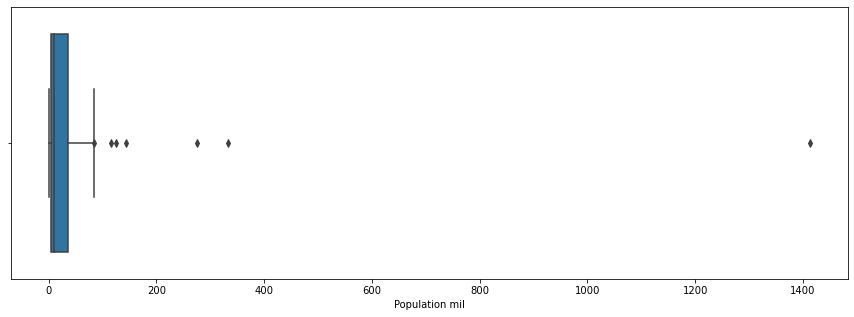

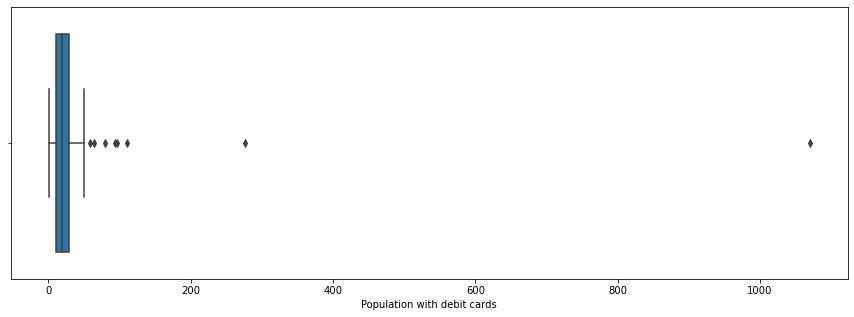

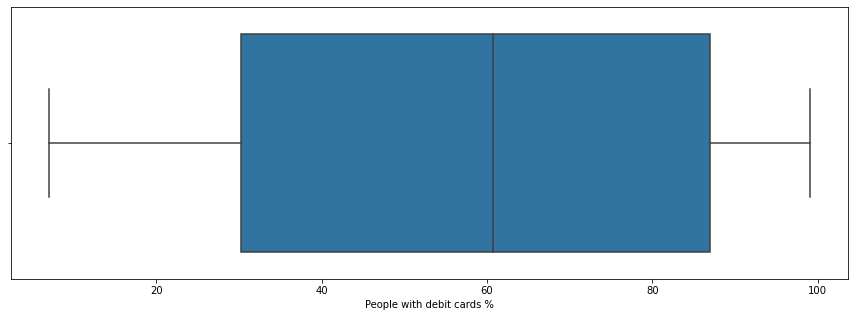

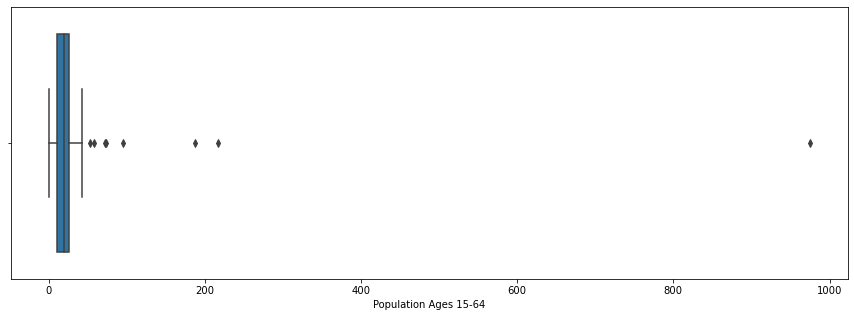

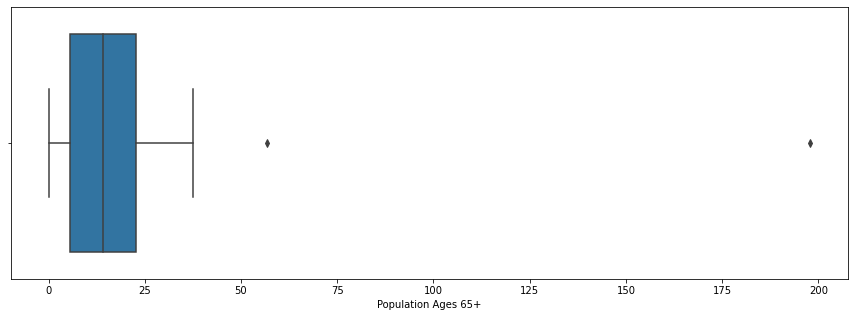

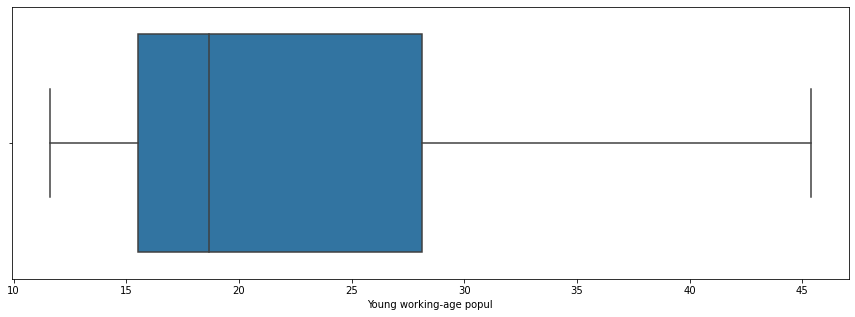

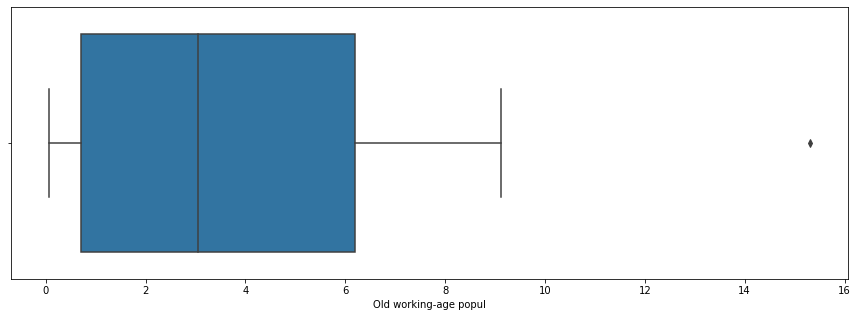

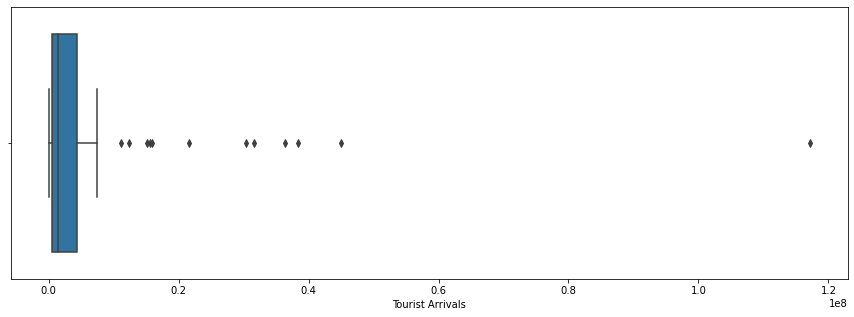

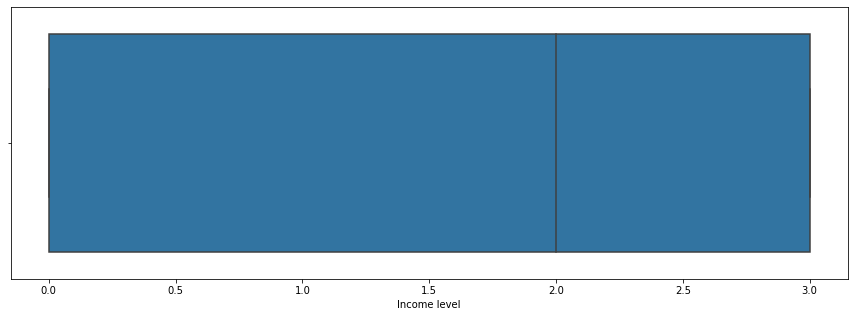

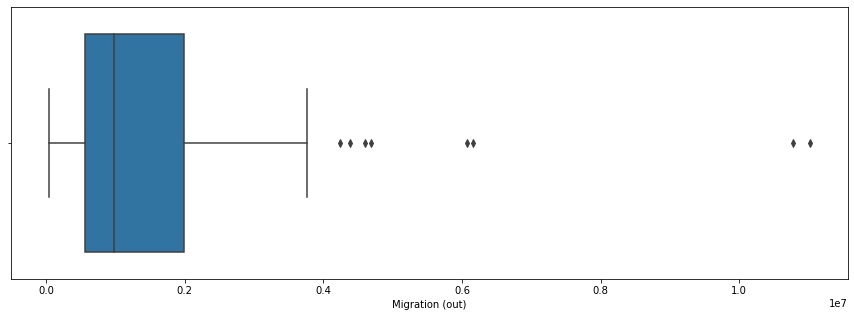

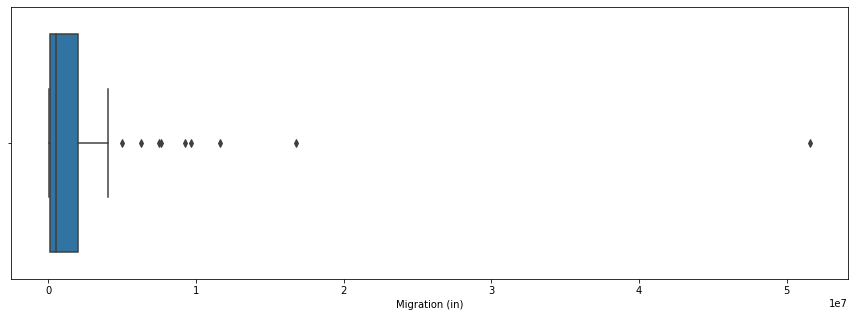

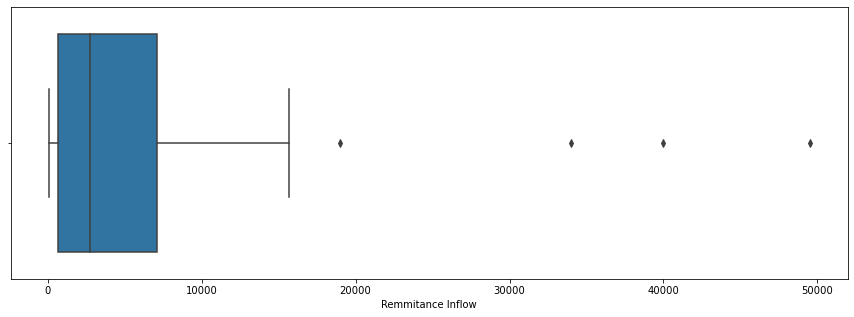

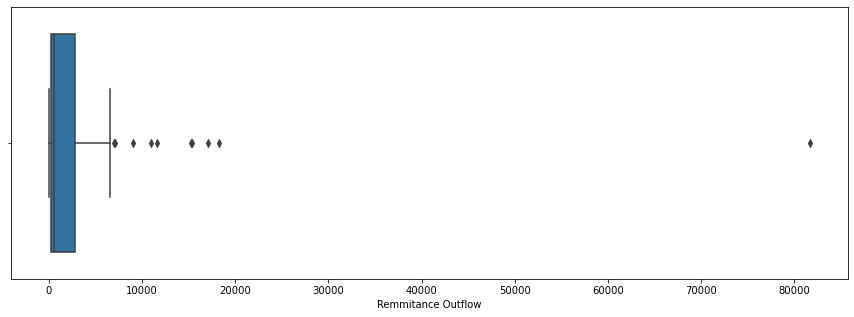

In [40]:
for i in data.columns:
    plt.figure(figsize=(15, 5))
    sns.boxplot(data[i])
    plt.show()

<AxesSubplot:title={'center':'Remittance inflow distribution'}, xlabel='Remmitance Inflow', ylabel='Density'>

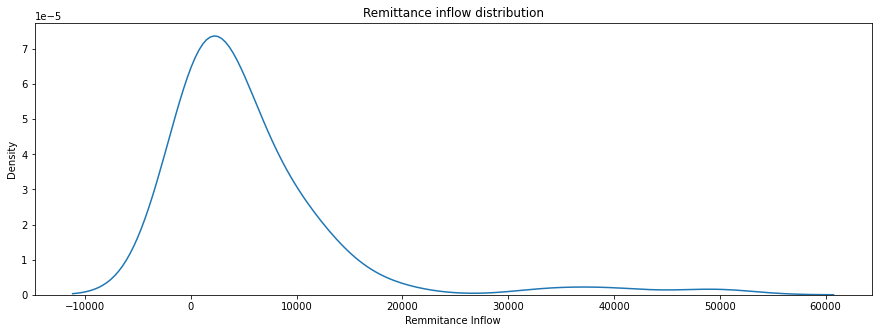

In [41]:
plt.figure(figsize=(15, 5))
plt.title('Remittance inflow distribution')
sns.kdeplot(y_inflow)

<AxesSubplot:title={'center':'Remittance outflow distribution'}, xlabel='Remmitance Outflow', ylabel='Density'>

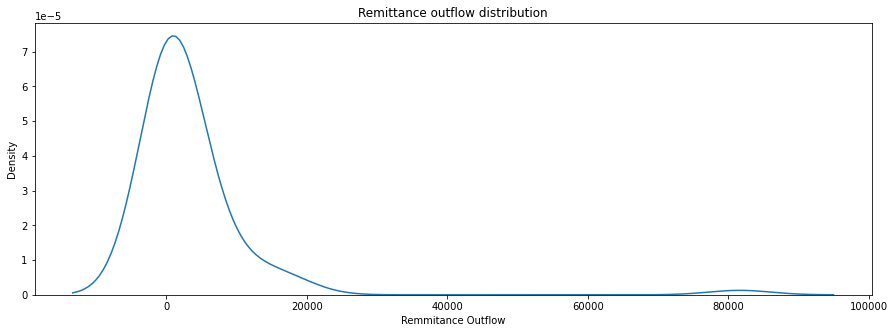

In [42]:
plt.figure(figsize=(15, 5))
plt.title('Remittance outflow distribution')
sns.kdeplot(y_outflow)

<AxesSubplot:title={'center':'Features and target heatmap'}>

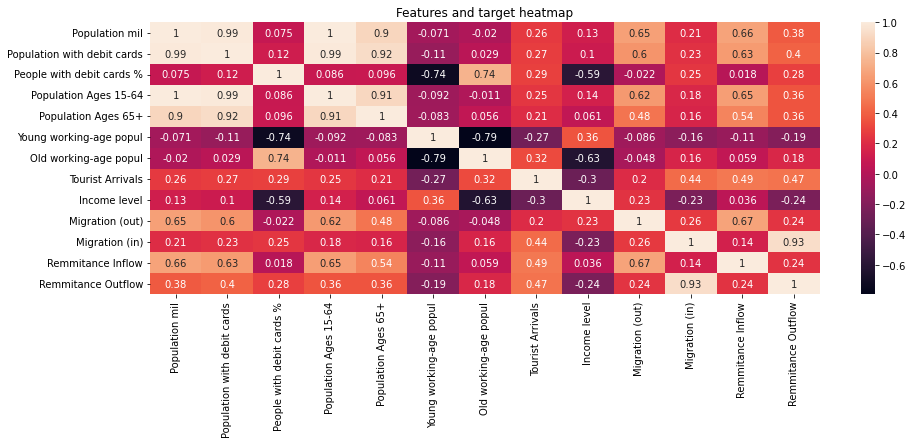

In [43]:
plt.figure(figsize=(15, 5))
plt.title('Features and target heatmap')
sns.heatmap(data.corr(), annot=True)

In [44]:
model = sm.OLS(y_inflow, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Remmitance Inflow   R-squared:                       0.689
Model:                            OLS   Adj. R-squared:                  0.630
Method:                 Least Squares   F-statistic:                     11.70
Date:                Thu, 23 May 2024   Prob (F-statistic):           4.11e-11
Time:                        19:20:28   Log-Likelihood:                -693.42
No. Observations:                  70   AIC:                             1411.
Df Residuals:                      58   BIC:                             1438.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                        8352.5352   6465.144      1.292      0.202   -4588.857    2.13e+04
Population mil                 72.8425     59.547      1.223      0.226     -46.354     192.040
Population with debit cards   -18.9128     44.100     -0.429      0.670    -107.189      69.363
People with debit cards %     -50.5202     37.585     -1.344      0.184    -125.755      24.715
Population Ages 15-64         -63.8342     79.887     -0.799      0.428    -223.745      96.077
Population Ages 65+            24.1677     77.727      0.311      0.757    -131.419     179.754
Young working-age popul      -131.3286    158.940     -0.826      0.412    -449.481     186.824
Old working-age popul         -57.0097    435.534     -0.131      0.896    -928.825     814.805
Tourist Arrivals                0.0002   4.71e-05      4.513      0.000       0.000       0.000
Income level                 -621.2476    796.268     -0.780      0.438   -2215.152     972.657
Migration (out)                 0.0016      0.000      3.237      0.002       0.001       0.003
Migration (in)                 -0.0003      0.000     -2.414      0.019      -0.001   -4.91e-05
==============================================================================
Omnibus:                       51.699   Durbin-Watson:                   1.856
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              300.219
Skew:                           2.026   Prob(JB):                     6.43e-66
Kurtosis:                      12.301   Cond. No.                     1.87e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.87e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [45]:
model = sm.OLS(y_outflow, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     Remmitance Outflow   R-squared:                       0.937
Model:                            OLS   Adj. R-squared:                  0.925
Method:                 Least Squares   F-statistic:                     78.05
Date:                Thu, 23 May 2024   Prob (F-statistic):           1.42e-30
Time:                        19:20:28   Log-Likelihood:                -649.72
No. Observations:                  70   AIC:                             1323.
Df Residuals:                      58   BIC:                             1350.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                        4033.5583   3463.368      1.165      0.249   -2899.125     1.1e+04
Population mil                 46.7610     31.899      1.466      0.148     -17.093     110.615
Population with debit cards   -38.1892     23.624     -1.617      0.111     -85.478       9.100
People with debit cards %       0.2182     20.134      0.011      0.991     -40.085      40.522
Population Ages 15-64         -12.7516     42.795     -0.298      0.767     -98.416      72.912
Population Ages 65+            75.1853     41.638      1.806      0.076      -8.162     158.533
Young working-age popul      -125.9528     85.144     -1.479      0.144    -296.387      44.481
Old working-age popul        -208.2884    233.315     -0.893      0.376    -675.318     258.742
Tourist Arrivals             1.545e-05   2.52e-05      0.612      0.543   -3.51e-05     6.6e-05
Income level                 -128.9057    426.560     -0.302      0.764    -982.758     724.946
Migration (out)                -0.0011      0.000     -4.169      0.000      -0.002      -0.001
Migration (in)                  0.0014   6.39e-05     22.151      0.000       0.001       0.002
==============================================================================
Omnibus:                       19.335   Durbin-Watson:                   2.022
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               97.427
Skew:                          -0.411   Prob(JB):                     6.98e-22
Kurtosis:                       8.721   Cond. No.                     1.87e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.87e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""